In [ ]:
from context import CL61_module as mCL61

In [ ]:
import cmcrameri.cm as cmc

COLOR_MAP = cmc.batlow
BATLOW_7COLORS  = [{"name":"Fairy Tale","hex":"FBC5E6","rgb":[251,197,230],"cmyk":[0,22,8,2],"hsb":[323,22,98],"hsl":[323,87,88],"lab":[85,24,-9]},
                   {"name":"Olive","hex":"88842B","rgb":[136,132,43],"cmyk":[0,3,68,47],"hsb":[57,68,53],"hsl":[57,52,35],"lab":[54,-10,47]},
                   {"name":"Fern green","hex":"4C734B","rgb":[76,115,75],"cmyk":[34,0,35,55],"hsb":[119,35,45],"hsl":[119,21,37],"lab":[45,-22,18]},
                   {"name":"Penn Blue","hex":"03245C","rgb":[3,36,92],"cmyk":[97,61,0,64],"hsb":[218,97,36],"hsl":[218,94,19],"lab":[16,14,-37]},
                   {"name":"Butterscotch","hex":"D69444","rgb":[214,148,68],"cmyk":[0,31,68,16],"hsb":[33,68,84],"hsl":[33,64,55],"lab":[66,17,51]},
                   {"name":"Melon","hex":"FCAC99","rgb":[252,172,153],"cmyk":[0,32,39,1],"hsb":[12,39,99],"hsl":[12,94,79],"lab":[78,27,22]},
                   {"name":"Midnight green","hex":"115362","rgb":[17,83,98],"cmyk":[83,15,0,62],"hsb":[191,83,38],"hsl":[191,70,23],"lab":[32,-14,-14]}]

COLOR_CODES_BLUE_YEL = ['#03245C', '#D69444']

# Get Dataset and process

In [5]:
februar = mCL61.CL61Processor(folder_path='../Data', specific_filename='temp_20230204.nc')
june = mCL61.CL61Processor(folder_path='../Data', specific_filename='temp_1d_test.nc')

Loading config file at C:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.yml 
Loading config file at C:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.yml 


In [6]:
februar.process.mask_noise()
june.process.mask_noise()

The results are stored under new variable: beta_att_clean, linear_depol_ratio_clean, noise mask and to_interpolate_mask
The results are stored under new variable: beta_att_clean, linear_depol_ratio_clean, noise mask and to_interpolate_mask


# Plot colormessh

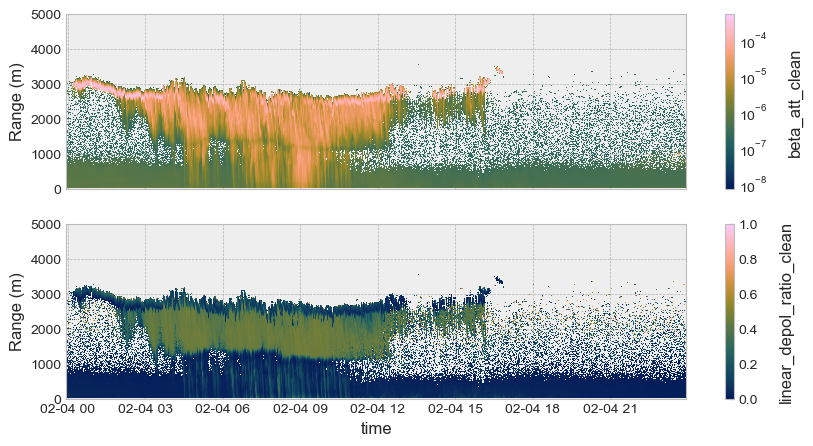

In [7]:
februar.plot.visualize_data(plot_type='colormesh', varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'])

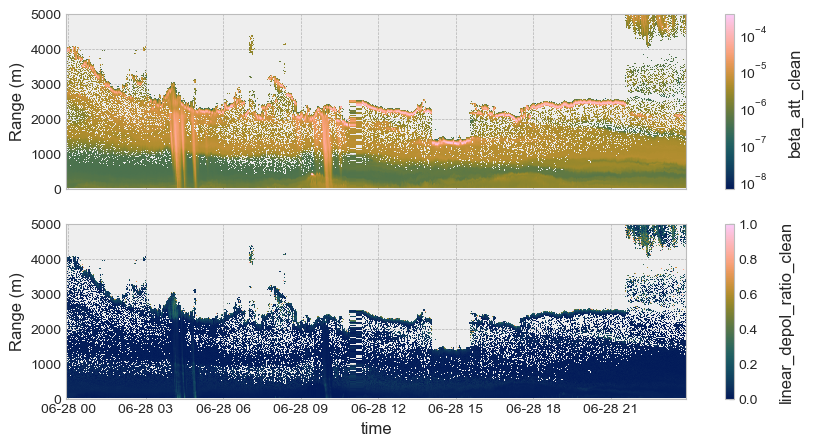

In [8]:
june.plot.visualize_data(plot_type='colormesh', varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'])

## Plot with datashader

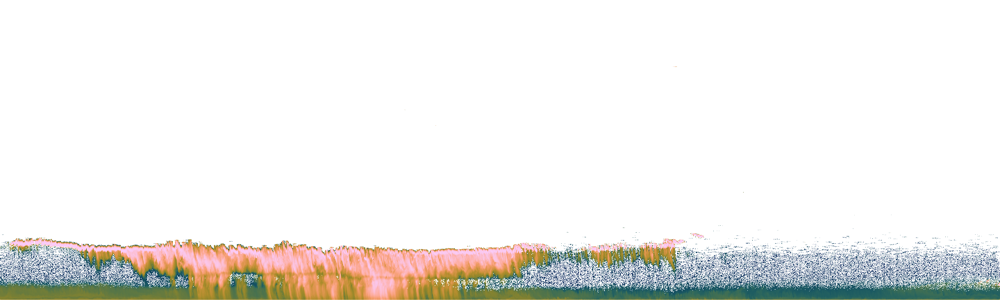

In [9]:
import datashader as ds
import datashader.transfer_functions as tf
import numpy as np

# Create a Datashader Canvas
cvs = ds.Canvas(plot_width=300, plot_height=100)

# Log-transform the data
log_back_att_arr = np.log10(februar.dataset['beta_att_clean'])

# Define the color map and normalization
color_map = COLOR_MAP
vmin = 1e-9
vmax = 1e-4
#color_mapper = ds.transfer_functions.dv.CMap(color_map)
color_range = [vmin, vmax]

# Create the plot
img = tf.shade(log_back_att_arr.T, cmap=cmc.batlow)

# Display the plot using Matplotlib or another plotting library
pil_img = tf.set_background(img, "white").to_pil().resize((1000, 300))
pil_img

## Other way to directly plot xarray

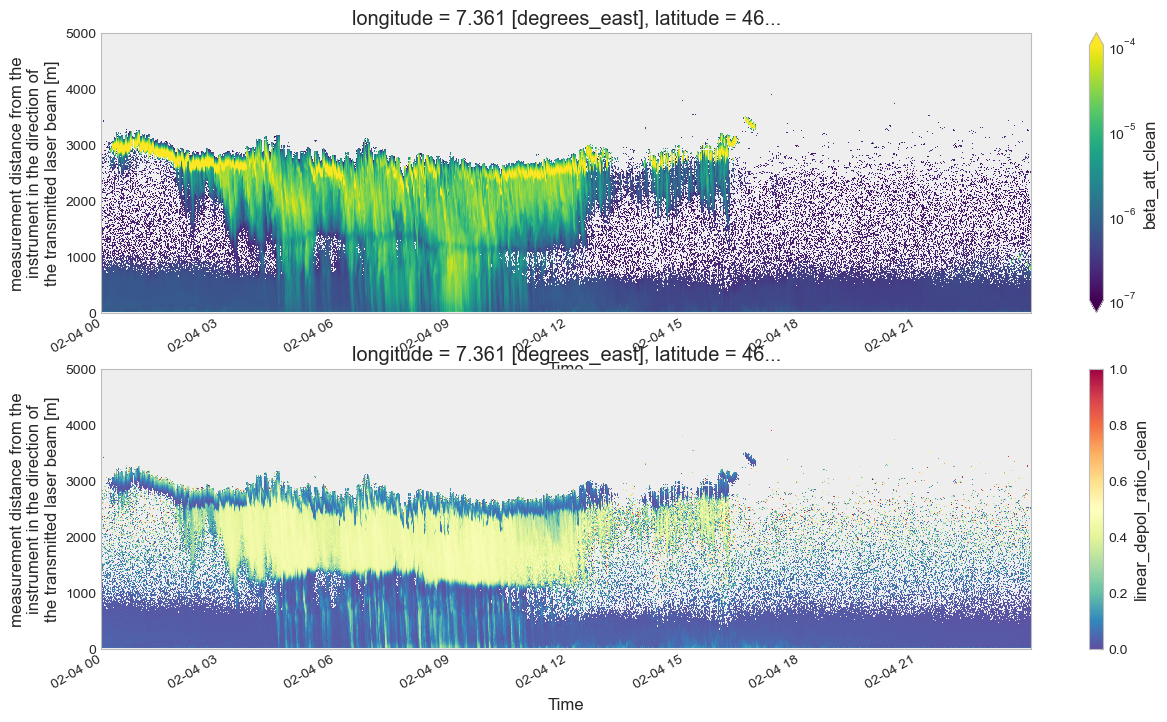

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

lims = [1e-7,1e-4]
hlims = [0,5000]
var1_arr = februar.dataset['beta_att_clean']
var2_arr = februar.dataset['linear_depol_ratio_clean']

fig, axs = plt.subplots(2,1, figsize=(15,8))

var1_arr.plot(x= 'time', y = 'range', ax = axs[0], vmin= lims[0], vmax = lims[1],
               norm=colors.LogNorm(vmin=lims[0], vmax=lims[1]), ylim = hlims)

var2_arr.plot(x = 'time', y = 'range', cmap='Spectral_r', vmin=0, vmax=1, ax=axs[1], ylim=hlims)

# Plot histograms

saved element to ..\Outputs\2023-02-03_hist2D


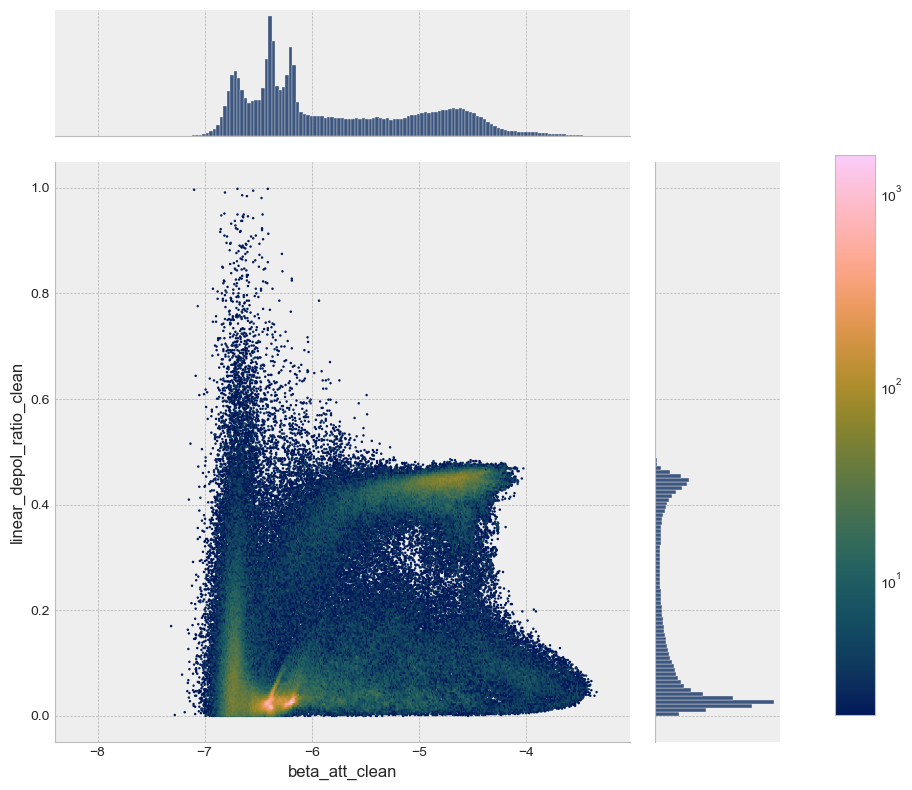

In [11]:
februar.plot.plot_histogram()

saved element to ..\Outputs\2023-06-27_hist2D


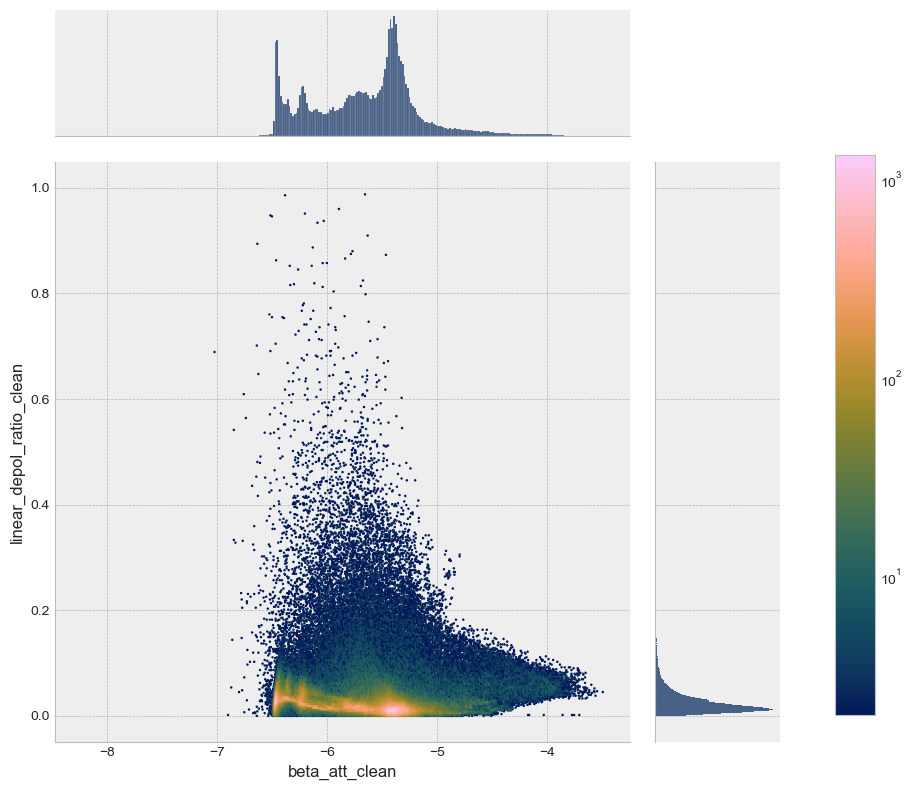

In [12]:
june.plot.plot_histogram()

# Plot profiles

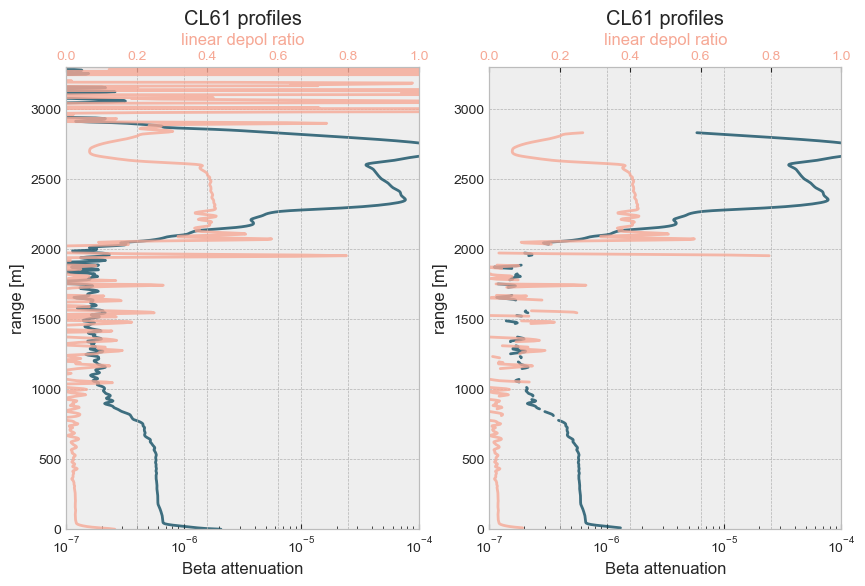

array([<Axes: xlabel='Beta attenuation', ylabel='range [m]'>,
       <Axes: xlabel='Beta attenuation', ylabel='range [m]'>],
      dtype=object)

In [13]:
februar.plot.compare_profiles(time_period='02-04-2023 03:00', comparison='variable', range_limits=[0,3300])

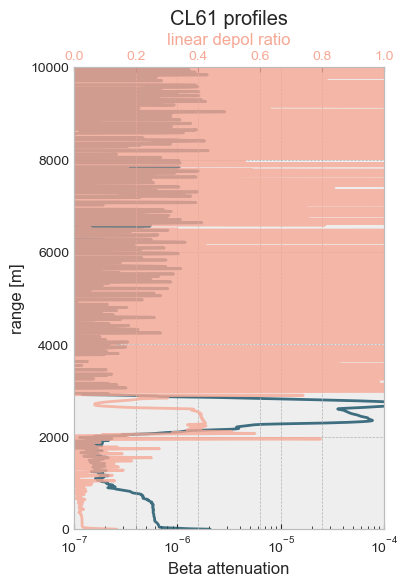

In [14]:
februar.plot.vertical_profiles(time_of_interest='02-04-2023 03:00', range_limits=[0,10000])

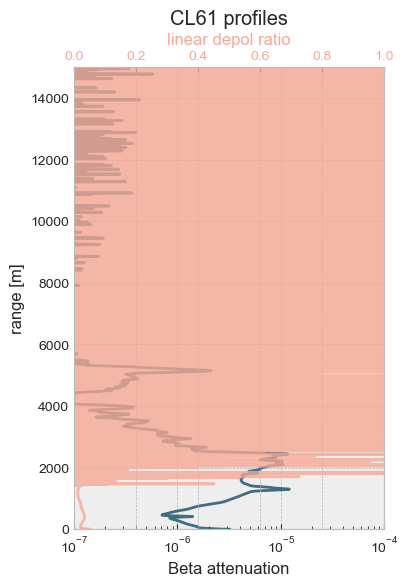

In [15]:
june.plot.vertical_profiles() #Without arguments, it takes the avg profiles

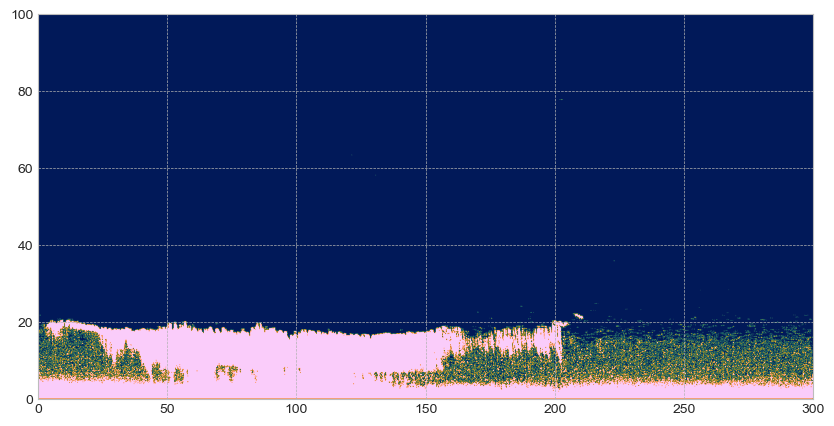

In [16]:
import datashader as ds
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Create a Datashader Canvas
cvs = ds.Canvas(plot_width=300, plot_height=100)

variable = 'beta_att_clean'
# Log-transform the data
#aa = xr.where(februar.dataset[variable]>1e-8, februar.dataset[variable], 1e-8)
#aa = xr.where(<1e-4, aa, 1e-4)
#log_back_att_arr = np.log10(februar.dataset[variable])
log_back_att_arr = februar.dataset[variable]

# Define the color map and normalization
color_map = 'cmc_batlow'
vmin = 1e-9
vmax = 1e-4

log_back_att_arr = np.clip(log_back_att_arr, vmin, vmax)
log_back_att_arr = (log_back_att_arr - vmin) / (vmax - vmin)

# Create the plot
img = tf.shade(log_back_att_arr.T, cmap=cmc.batlow)

# Truncate color values to the range [vmin, vmax] and rescale
#normalized_img = tf.interpolate(log_back_att_arr.T, cmap=cmc.batlow, how='linear', span=(vmin, vmax))

# Define the extent based on the plot_width and plot_height
extent = [0, cvs.plot_width, 0, cvs.plot_height]

# Create the figure with the desired figsize
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Show the image with the specified extent
imgplot = ax.imshow(img, extent=extent, aspect='auto', origin='lower')
imgplot.set_cmap(cmc.batlow)

# Add labels or other customizations if needed
plt.show()


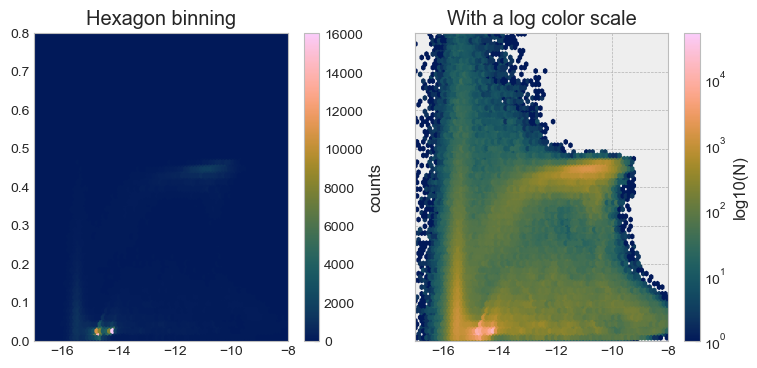

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = np.log(februar.dataset['beta_att_clean'].values.flatten())
y = februar.dataset['linear_depol_ratio_clean'].values.flatten()

fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True, figsize=(9, 4))

hb = ax0.hexbin(x, y, gridsize=100, cmap=cmc.batlow)
ax0.set(xlim=[-17, -8], ylim=[0,1])
ax0.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax0, label='counts')

hb = ax1.hexbin(x, y, gridsize=100, vmin=1, vmax=5e4, bins='log', cmap=cmc.batlow)
ax1.set(xlim=[-17, -8], ylim=[0,0.8])
ax1.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax1, label='log10(N)')

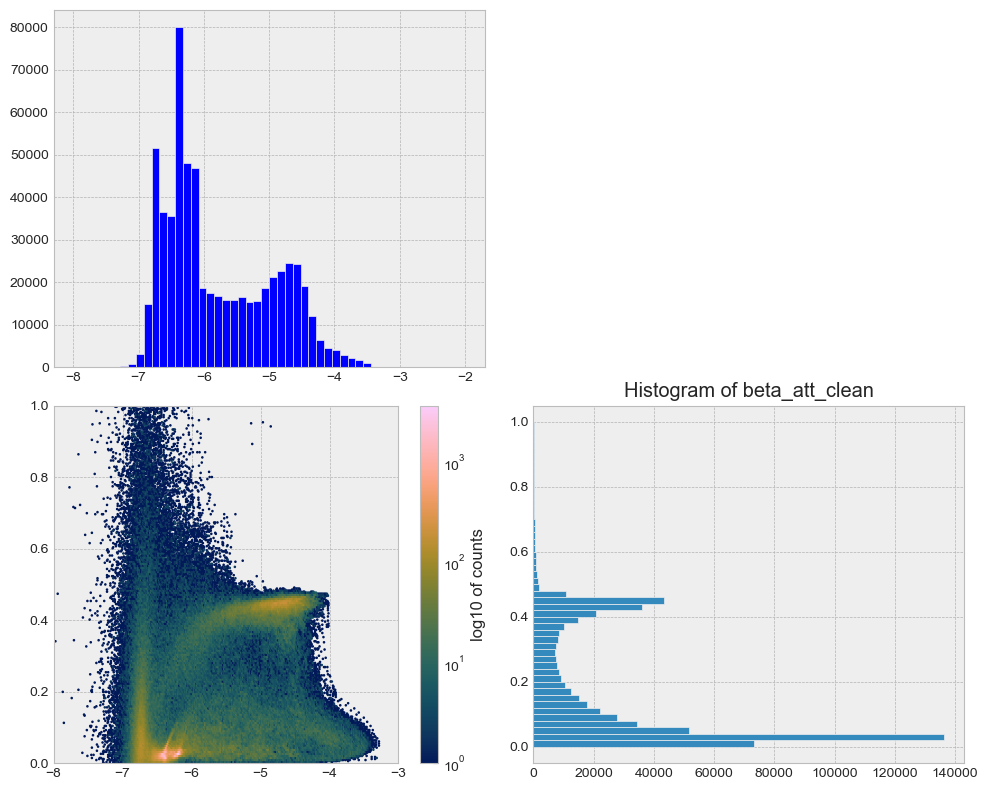

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.log10(februar.dataset['beta_att_clean'].values.flatten())
y = februar.dataset['linear_depol_ratio_clean'].values.flatten()

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#histogram of linear_depol_ratio_clean in the upper-right
ax0 = axs[0, 0]
ax0.hist(np.log10(februar.dataset['beta_att_clean'].values.flatten()),
         range = [-8, -2],
         bins=50, color='blue', log=False)

# Hexbin plot in the lower-left
ax1 = axs[1, 0]
hb = ax1.hexbin(x, y, gridsize=300, bins='log', cmap=cmc.batlow)
ax1.set(xlim=[-8, -3], ylim=[0, 1])
cb = fig.colorbar(hb, ax=ax1, label='log10 of counts')

# Histogram of beta_att_clean in the lower-right
ax2 = axs[1, 1]
#h1 = februar.dataset['beta_att_clean'].plot.hist(ax=ax2, xscale = 'log')
plt.hist(februar.dataset['linear_depol_ratio_clean'].values.flatten(),
         bins=50,
         orientation='horizontal',
         log=False)
ax2.set_title("Histogram of beta_att_clean")



# Leave the upper-left subplot empty
ax4 = axs[0, 1]
ax4.axis('off')

plt.tight_layout()
plt.show()

# Cluster and visualize

In [ ]:
februar.process.perform_kmeans_clustering(variable_as_features=['beta_att_clean', 'linear_depol_ratio_clean', 'range'],
                                          weights=[1,1, 0.3],
                                          cluster_number=8,
                                          plot_result=True,
                                          kmean_method  = 'random')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np


# Choose the base colormap (e.g., 'viridis', 'coolwarm', 'cividis', etc.)
base_cmap = cmc.batlow

# Define the number of colors in the new colormap
N = 8

# Extract a sufficient number of colors from the base colormap
base_colors = base_cmap(np.linspace(0, 1, num=N))

# Shuffle the colors randomly
np.random.shuffle(base_colors)

# Take the first N shuffled colors to create the new colormap
new_cmap = mcolors.ListedColormap(base_colors)

# Generate some example data
x = np.log(februar.dataset['beta_att_clean'].values.flatten())
y = februar.dataset['linear_depol_ratio_clean'].values.flatten()
z = februar.dataset['kmean_clusters'].values.flatten()


fig, ax = plt.subplots(1,1, figsize=(8,5))
# Create a hexbin plot
hb = plt.hexbin(x, y, C=z, cmap=new_cmap, gridsize=500, mincnt=2)

# Add a colorbar to show the mapping of z values to colors
plt.colorbar(label='Color')

# Add labels and a title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Hexbin Plot withColor Mapping')

plt.show()


In [ ]:
import seaborn as sns
import pandas as pd

sns.set_theme(style="ticks")
x = np.log(februar.dataset['beta_att_clean'].values.flatten())
y = februar.dataset['linear_depol_ratio_clean'].values.flatten()
z = februar.dataset['kmean_clusters'].values.flatten()

df = pd.DataFrame({'beta': x, 'depol':y, 'class':z})

# Load the planets dataset and initialize the figure
g = sns.JointGrid(data=df, x="beta", y="depol")

# Create a scatterplot
sns.scatterplot(data=df, x="beta", y="depol", hue="class", ax=g.ax_joint)

# Add marginal histograms
sns.histplot(data=df, x="beta", ax=g.ax_marg_x)
sns.histplot(data=df, y="depol", ax=g.ax_marg_y, color="g")


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme(style="ticks")

x = np.log(februar.dataset['beta_att_clean'].values.flatten())
y = februar.dataset['linear_depol_ratio_clean'].values.flatten()
z = februar.dataset['kmean_clusters'].values.flatten()

df = pd.DataFrame({'beta': x, 'depol':y, 'class':z})

sns.displot(data=df, x='beta', y='depol', hue='class')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.gridspec as gridspec


# Generate some example data
x = np.log(februar.dataset['beta_att_clean'].values.flatten())
y = februar.dataset['linear_depol_ratio_clean'].values.flatten()
z = februar.dataset['kmean_clusters'].values.flatten()
df = pd.DataFrame({'beta': x, 'depol':y, 'class':z})


# Create a hexbin plot
g = sns.JointGrid(data=df, x="beta", y="depol")

hb = g.ax_joint.hexbin(x, y, C=z, gridsize=500, cmap=new_cmap, mincnt=2)

# Add a colorbar to show the mapping of z values to colors
cbar = plt.colorbar(hb, ax=g.ax_joint)
cbar.set_label('Color')


# Create marginal histograms using Seaborn
sns.histplot(data=df, x="beta", ax=g.ax_marg_x, color='b')
sns.histplot(data=df, y="depol", ax=g.ax_marg_y, color='b', orientation='horizontal')


## Tests to vizualize as 3D histogram contour layers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, ticker
# Your data
x = np.log(februar_cl61.dataset['beta_att_clean'].values.flatten())
y = februar_cl61.dataset['linear_depol_ratio_clean'].values.flatten()
range_array = np.repeat(februar_cl61.dataset['range'], y.size // len(februar_cl61.dataset['range']))
points_all = np.vstack((x, y, range_array)).T
points = points_all[~np.isnan(points_all).any(axis=1), :]

heights = np.logspace(2,4, num=5)
#heights = [500, 1000, 2000, 3000, 6000]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

last_h = 0
for i, h in enumerate(heights):
        
    condition = (points[:, 2] > max((0,heights[i]-500))) & (points[:, 2] < min(heights[i]+500, 1500))
    selected_points = points[condition]

    # Create a 2D histogram of your data
    H, xedges, yedges = np.histogram2d(selected_points[:,0], selected_points[:,1], bins=(10, 10))  # You can adjust the number of bins (e.g., 100x100)

    X, Y = np.meshgrid(xedges[:-1],yedges[:-1])

    # Plot the contour lines
    cs = ax.contourf(X, Y, H, 
                    zdir='z', 
                    offset=np.log10(heights[i]),
                    levels = 100,
                    cmap='cmc.batlow', 
                    alpha=0.5)
    #cs = ax.hexbin(selected_points[:,0], selected_points[:,1]
    #            , gridsize=50, bins='log', cmap='inferno', zdir = 'z', offset = heights[1])

#plt.zscale('log')
ax.set_xlim(-18, -10)
#ax1.set_ylim(-3, 3)
ax.set_zlim(1.5, 3.5)
plt.colorbar(cs)
plt.show()